C:\Users\91766\AppData\Local\Temp\ipykernel_15588\3215895689.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DateTime"] = pd.to_datetime(df["DateTime"])


🌧️ Rain is forecasted at these times:

📅 2025-09-13 18:00:00  🌡️ 23.13°C
📅 2025-09-13 21:00:00  🌡️ 22.62°C
📅 2025-09-14 00:00:00  🌡️ 21.77°C
📅 2025-09-14 03:00:00  🌡️ 21.69°C
📅 2025-09-14 06:00:00  🌡️ 21.77°C
📅 2025-09-14 09:00:00  🌡️ 25.94°C
📅 2025-09-14 12:00:00  🌡️ 24.61°C
📅 2025-09-14 15:00:00  🌡️ 22.08°C
📅 2025-09-14 18:00:00  🌡️ 21.42°C
📅 2025-09-14 21:00:00  🌡️ 21.19°C
📅 2025-09-15 00:00:00  🌡️ 21.22°C
📅 2025-09-15 03:00:00  🌡️ 21.86°C
📅 2025-09-15 09:00:00  🌡️ 25.23°C
📅 2025-09-15 12:00:00  🌡️ 23.17°C
📅 2025-09-15 15:00:00  🌡️ 22.11°C
📅 2025-09-15 18:00:00  🌡️ 21.58°C
📅 2025-09-15 21:00:00  🌡️ 21.37°C
📅 2025-09-16 00:00:00  🌡️ 21.11°C
📅 2025-09-16 03:00:00  🌡️ 21.04°C
📅 2025-09-17 09:00:00  🌡️ 26.28°C
📅 2025-09-17 12:00:00  🌡️ 24.39°C
📅 2025-09-18 09:00:00  🌡️ 26.4°C
📅 2025-09-18 12:00:00  🌡️ 23.97°C
📅 2025-09-18 15:00:00  🌡️ 21.84°C


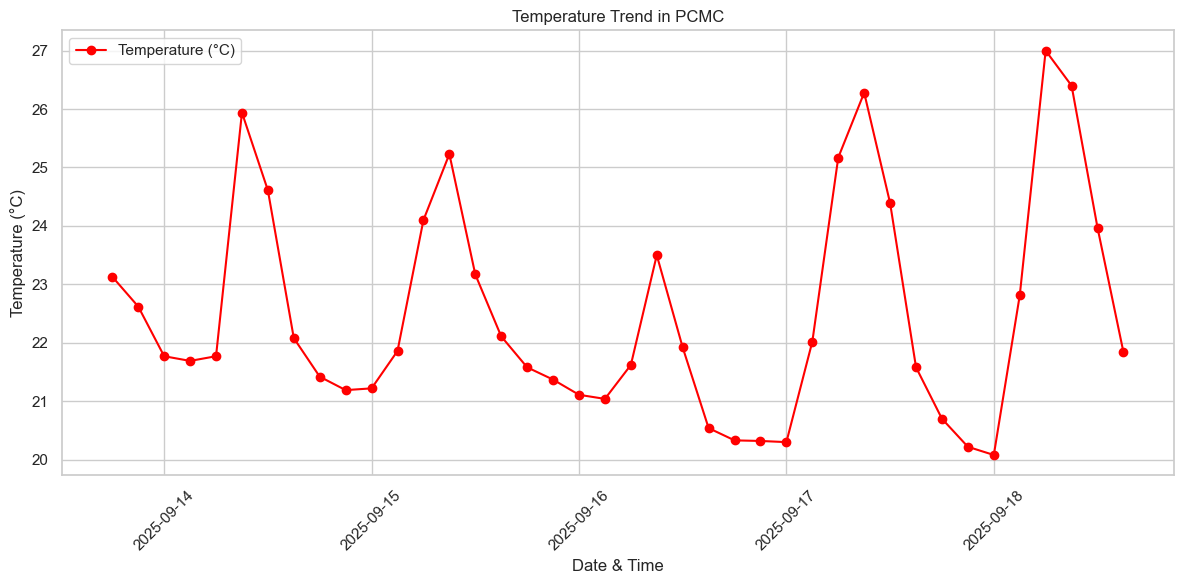

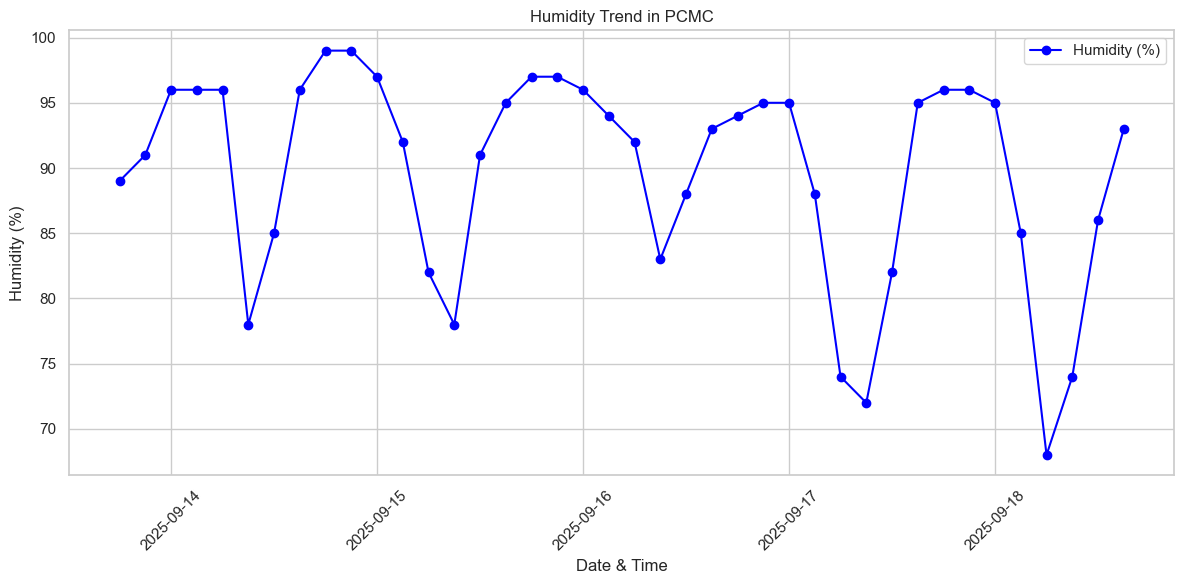

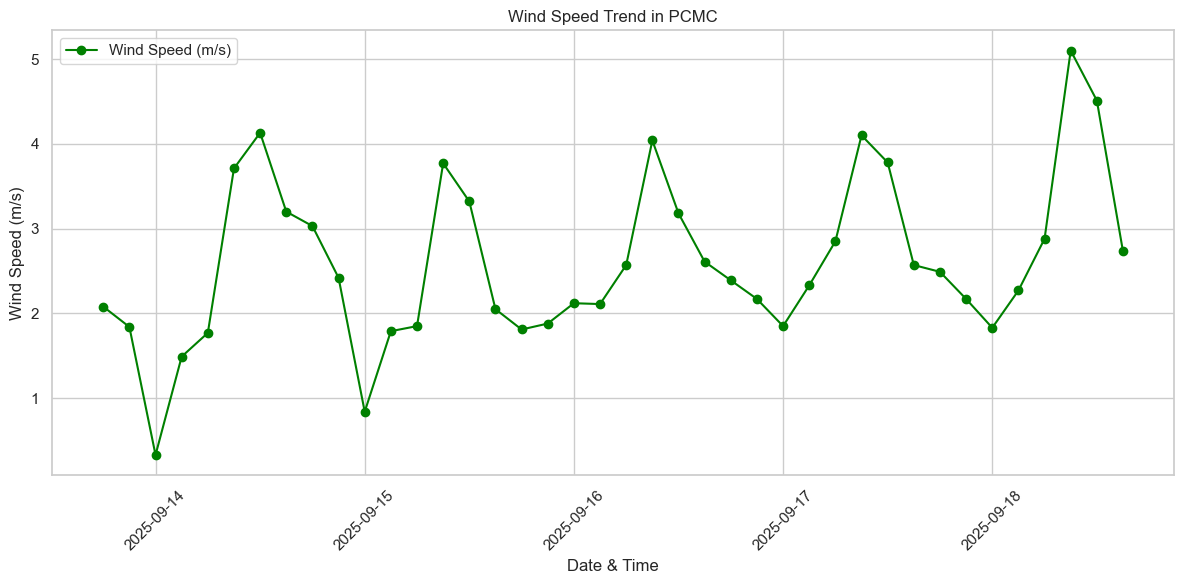

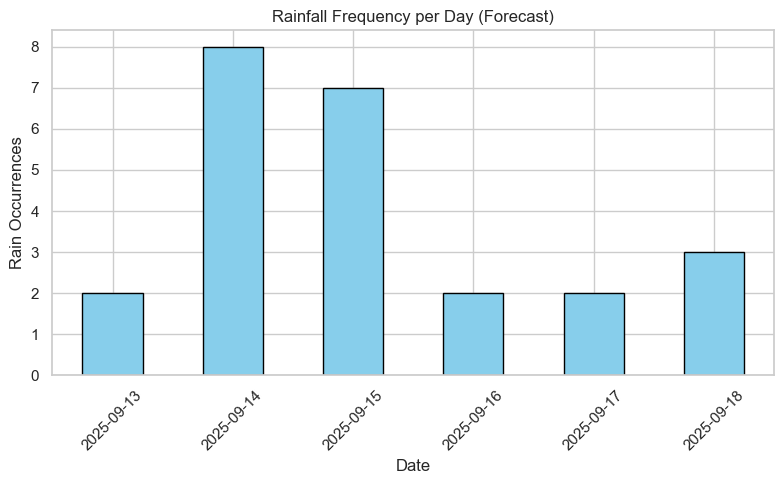

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tomlkit import datetime

API_KEY = "a7589f1eed38e02e1bcfcc3cad53f145"
CITY = "PCMC"
LAT = 18.635173
LON = 73.817634
URL = f"https://api.openweathermap.org/data/2.5/forecast?lat={LAT}&lon={LON}&appid={API_KEY}&units=metric"

response = requests.get(URL)
data = response.json()


# Extract relevant data
forecast_list = []

for entry in data['list']:
    info = {
        "DateTime": entry['dt_txt'],
        "Temperature_C": entry['main']['temp'],
        "Humidity_%": entry['main']['humidity'],
        "Weather": entry['weather'][0]['main'],
        "Wind_Speed_m/s": entry['wind']['speed']
    }
    forecast_list.append(info)
df = pd.DataFrame(forecast_list)


# Save data
df["DateTime"] = pd.to_datetime(df["DateTime"]).dt.strftime("%Y-%m-%d %I:%M %p")
df.to_csv("01_Weather_data_analyse/forecast_1day.csv", index=False)

"""# : Overwrite Behavior
 1- By default, to_csv() does not append.
 2- Instead, it opens the file in write mode ('w').
 3- This means:
     i) If the file doesn’t exist, Python creates a new one.
     ii) If the file already exists, Python erases (deletes) all its old contents first,then writes the new data."""


# Visualizations of data 

# 4 - Remainder for when it will rain take umbrella with you 


# Convert 'Datetime' column to pandas datetime format
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Filter only Rainy times
rain_forecast = df[df["Weather"] == "Rain"]

if not rain_forecast.empty:
    print("🌧️ Rain is forecasted at these times:\n")
    for index, row in rain_forecast.iterrows():
        # Format to 12-hour with AM/PM
        print(f"📅 {row["DateTime"]}  🌡️ {row['Temperature_C']}°C")
else:
    print("☀️ No rain in the forecast!")




# 1 - Temperature Trend

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
plt.plot(df["DateTime"], df["Temperature_C"], marker="o", color="red", label="Temperature (°C)")
plt.xticks(rotation=45)
plt.title(f"Temperature Trend in {CITY}")
plt.xlabel("Date & Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

# 2 - Humidity Trend

plt.figure(figsize=(12,6))
plt.plot(df["DateTime"], df["Humidity_%"], marker="o", color="blue", label="Humidity (%)")
plt.xticks(rotation=45)
plt.title(f"Humidity Trend in {CITY}")
plt.xlabel("Date & Time")
plt.ylabel("Humidity (%)")
plt.legend()
plt.tight_layout()
plt.show()

# 3 - Wind Speed Trend
plt.figure(figsize=(12,6))
plt.plot(df["DateTime"], df["Wind_Speed_m/s"], marker="o", color="green", label="Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.title(f"Wind Speed Trend in {CITY}")
plt.xlabel("Date & Time")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.tight_layout()
plt.show()


# 4. Rainfall Frequency (Bar Chart by Day)
# Count number of rainy forecasts per day
df["Date"] = df["DateTime"].dt.date
rain_count = df[df["Weather"] == "Rain"]["Date"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
rain_count.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Rainfall Frequency per Day (Forecast)")
plt.xlabel("Date")
plt.ylabel("Rain Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# Extra Streamlite Dashboard can be done